In [1]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg, get_base_network_name

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

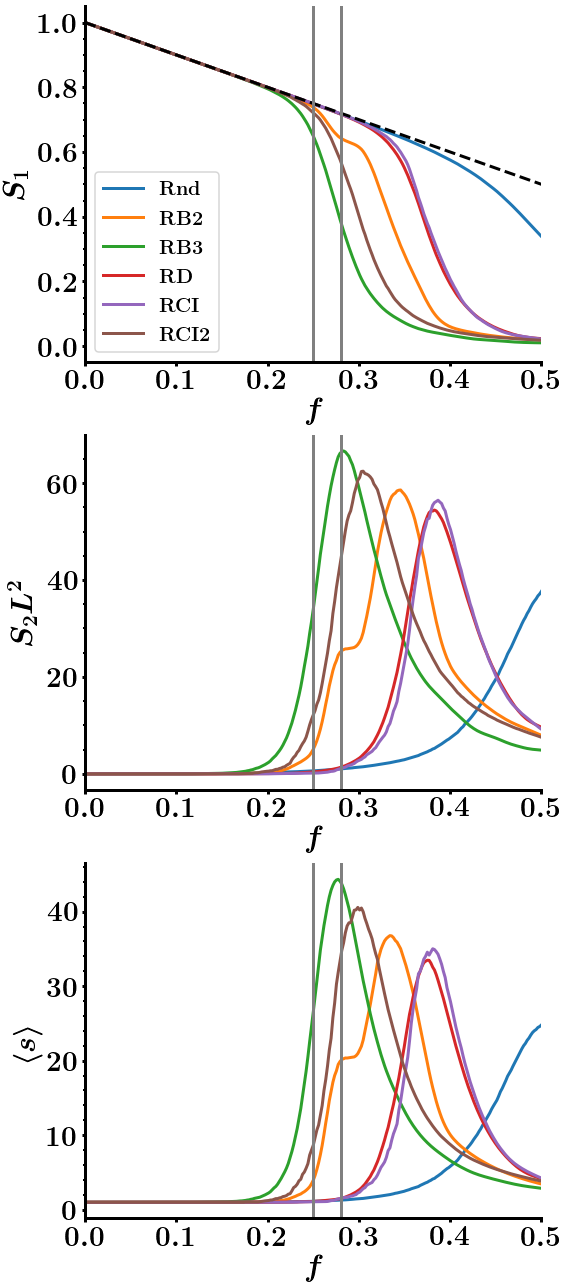

In [2]:
attacks = ['Ran', 'BtwU_cutoff2', 'BtwU_cutoff3', 'DegU', 'CIU', 'CIU2']
colormap = [f'C{i}' for i in range(10)]

ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes[0].set_ylabel(r'$S_1$')
axes[1].set_ylabel(r'$S_2L^2$')
axes[2].set_ylabel(r'$\langle s \rangle$')
for ax in axes:
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0, 0.5)
    
N = 512
for i, attack in enumerate(attacks):
    df = load_dataframe(net_type, N, param, attack)
    axes[0].plot(df.f, df.Sgcc, color=colormap[i], label=attack_dict[attack])
    axes[1].plot(df.f, df.Nsec, color=colormap[i])
    axes[2].plot(df.f, df.meanS, color=colormap[i])

X = np.linspace(0, 0.5, 1000)
axes[0].plot(X, 1-X, '--', color='k')
#for ax in axes:
#    ax.axvline(0.334, color='grey')

for ax in axes:
    ax.axvline(0.25, color='grey')
    ax.axvline(0.28, color='grey')
    
axes[0].legend(fontsize=20)


sns.despine()
plt.tight_layout()

fig_name = os.path.join(fig_dir, 'order_par_and_susceptibility_RB2_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

In [22]:
attack = 'BtwU_cutoff2'

sizes = np.array([256, 512, 1024, 2048, 4096, 8192, 16384])
all_mean_values = []
all_std_values = []
fluctuations = {}
for i, N in enumerate(sizes):
    print(N)
    delta_values = load_delta(net_type, N, param, attack)
    try:
        delta_values[:,2] = delta_values[:,2]*N
    except IndexError:
        all_mean_values.append([np.NaN]*3)
        all_std_values.append([np.NaN]*3)
        continue
    mean_values = delta_values.mean(axis=0)
    std_values = delta_values.std(axis=0)
    
    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    
    fluctuations[N] = delta_values - mean_values
    
all_mean_values = np.array(all_mean_values)
all_std_values = np.array(all_std_values)


rc_values = all_mean_values[:,0]
delta_values = all_mean_values[:,1]

256
512
1024
2048
4096
8192
16384


In [23]:
rc_values

array([       nan,        nan,        nan, 0.3315981 , 0.33373442,
              nan, 0.33634879])

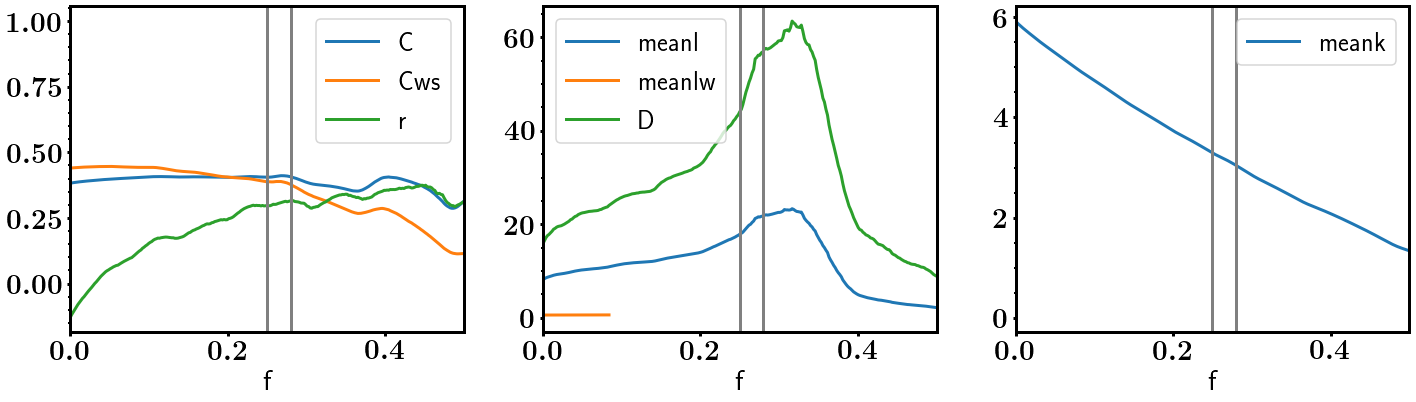

In [22]:
size = 512
nseeds = 100
attack = 'BtwU_cutoff2'
dir_name = os.path.join('../networks', net_type)
base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
net_dir_name = os.path.join(dir_name, base_net_name,
        base_net_name_size
)
data_file_name = os.path.join(net_dir_name, 'properties_{}_nSeeds{}_cpp.csv'.format(attack, nseeds))
df = pd.read_csv(data_file_name)

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
df.plot(x='f', y=['C', 'Cws', 'r'], ax=ax)

ax = axes[1]
df.plot(x='f', y=['meanl', 'meanlw', 'D'], ax=ax)

ax = axes[2]
df.plot(x='f', y=['meank'], ax=ax)

for ax in axes:
    ax.set_xlim(0, 0.5)
    ax.axvline(0.25, color='grey')
    ax.axvline(0.28, color='grey')

plt.show()